In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

# Team Members Look Here First

The meat for you guys right now is in my By Position Analysis showing where the missing values are by position. The Current Data Validation Summary provides a summary of what I found and my thoughts so far.

# EDA

We're conducting EDA on this completed dataset to understand our data. I should also check for completeness where I can. I need to get a sense of our dataset and start considering feature engineering.

## Considerations:

- There are 32 teams in the NFL. Anywhere were there is a team wide thing will only have 32 entries (or some multiple if multiple positions are allowed for).


## Ideas

- By team and by position analysis
- Check the players per team, the position distribution (per team and overall)
- Check similarity/correlation matrices
- consider reviewing by position
  - lets us look at only relevant metrics for that position
  - lets us see where the actual missing values are much easier

## Initial Analysis

In [2]:
df = pd.read_csv("nfl_2022_final_data.csv")
df

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
0,A.J. Brown,25.0,2022,1,WR,PHI,17.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,34.0,28.0,32.0,29.0,30.8,11
1,A.J. Green,34.0,2022,2,WR,ARI,15.0,10.0,NaN,NaN,...,NaN,NaN,NaN,1.0,301.0,213.0,211.0,301.0,212.0,72
2,AJ Dillon,24.0,2022,3,RB,GNB,17.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,97.0,63.0,68.0,43.0,67.8,26
3,Aaron Jones,28.0,2022,4,RB,GNB,17.0,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,18.0,17.0,22.0,19.5,10
4,Aaron Rodgers,39.0,2022,5,QB,GNB,17.0,17.0,542.0,350.0,...,NaN,NaN,NaN,NaN,68.0,90.0,61.0,102.0,80.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,Minnesota Vikings DST,NaN,2022,682,DEF,MIN,17.0,17.0,NaN,NaN,...,0.0,1.0,-4.0,NaN,222.0,301.0,203.0,247.0,224.0,21
682,Detroit Lions DST,NaN,2022,683,DEF,DET,17.0,17.0,NaN,NaN,...,1.0,1.0,-7.0,NaN,301.0,301.0,259.0,301.0,259.0,27
683,Indianapolis Colts DST,NaN,2022,684,DEF,IND,17.0,17.0,NaN,NaN,...,0.0,1.0,-6.0,NaN,136.0,147.0,67.0,144.0,123.5,4
684,Arizona Cardinals DST,NaN,2022,685,DEF,ARI,17.0,17.0,NaN,NaN,...,0.0,0.0,-10.0,NaN,301.0,301.0,191.0,276.0,233.5,23


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  686 non-null    object 
 1   Age                          654 non-null    float64
 2   Season                       686 non-null    int64  
 3   Player ID                    686 non-null    int64  
 4   Position                     686 non-null    object 
 5   Team                         628 non-null    object 
 6   Games Played                 686 non-null    float64
 7   Games Started                686 non-null    float64
 8   Passing Attempts             113 non-null    float64
 9   Passing Completions          113 non-null    float64
 10  Passing Yards                113 non-null    float64
 11  Passing Touchdowns           113 non-null    float64
 12  Interceptions Thrown         113 non-null    float64
 13  Rushing Attempts    

In [80]:
686 - 32 # Total entries - number of teams to verify age

654

There are obvious groupings above where we can be sure there are no missing values. Note also that Age is complete. Defensive teams dont have an Age entry. 

Fumbles lost and two point conversions are all nulls. Is that an error with collection or was there actually just no data for them? Definitely other examples of missing data points.

No clear division, may just be that the team player count isnt as even as it seems. Or missing people or something.

In [5]:
df.describe()

,Age,Season,Player ID,Games Played,Games Started,Passing Attempts,Passing Completions,Passing Yards,Passing Touchdowns,Interceptions Thrown,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
count,654.000000,686.0,686.000000,686.000000,686.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,32.000000,32.000000,32.000000,24.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,26.437309,2022.0,343.500000,11.959184,5.476676,159.902655,102.699115,1124.203540,6.637168,3.699115,...,0.406250,0.437500,5.281250,1.166667,239.450437,237.749271,235.820700,236.091837,232.564140,178.118076
std,3.482824,0.0,198.175427,5.280574,6.136540,204.670422,134.771161,1473.904037,9.724841,4.292612,...,0.614837,0.618922,8.666712,0.380693,95.803965,95.295123,94.354472,94.308433,92.790386,134.242234
min,21.000000,2022.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,24.000000,2022.0,172.250000,8.000000,0.000000,2.000000,1.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,-1.250000,1.000000,173.250000,172.250000,172.250000,173.250000,174.050000,29.000000
50%,26.000000,2022.0,343.500000,14.000000,2.000000,61.000000,38.000000,390.000000,1.000000,2.000000,...,0.000000,0.000000,5.500000,1.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
75%,28.000000,2022.0,514.750000,17.000000,11.000000,303.000000,192.000000,2163.000000,12.000000,6.000000,...,1.000000,1.000000,12.000000,1.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
max,45.000000,2022.0,686.000000,17.000000,17.000000,733.000000,490.000000,5250.000000,41.000000,15.000000,...,2.000000,2.000000,27.000000,2.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000


Need to break apart to actually view it, but may not be too useful at the moment.

First lets look at position values.

In [6]:
df['Position'].unique()

array(['WR', 'RB', 'QB', 'FB', 'TE', 'P', 'K', 'TE/QB', 'DEF'],
      dtype=object)

In [7]:
df['Position'].value_counts()

Position
WR       229
RB       145
TE       116
QB        84
K         44
DEF       32
P         23
FB        12
TE/QB      1
Name: count, dtype: int64

Interesting that some of these are fewer than the number of teams.

Looking at team values

In [8]:
df['Team'].unique()

array(['PHI', 'ARI', 'GNB', 'NOR', 'MIN', 'DEN', 'MIA', 'IND', 'LAR',
       'CLE', '2TM', 'LVR', 'DET', 'BAL', 'ATL', 'PIT', 'WAS', nan, 'LAC',
       'TEN', 'NWE', 'TAM', 'KAN', 'NYJ', 'HOU', 'SFO', 'CIN', 'DAL',
       'CHI', 'JAX', 'SEA', 'BUF', 'NYG', 'CAR', '3TM'], dtype=object)

In [9]:
len(df['Team'].unique())

35

Why are there 35 teams? Aren't there only 32?. The nan is obviously wrong, but that still brings us back to 34. My guess is 2TM and 3TM means a player on 2 or 3 teams.

Note from later, the nan is likely from the punters and kickers missing team values

In [10]:
df['Team'].value_counts()

Team
DEN    23
CHI    22
ARI    22
LAR    22
LAC    21
TEN    21
NOR    21
ATL    21
HOU    20
BAL    20
TAM    20
SFO    20
DAL    20
SEA    20
DET    19
NYG    19
WAS    19
NYJ    19
2TM    19
KAN    18
CIN    18
PIT    18
NWE    18
IND    18
MIA    18
BUF    18
CLE    17
MIN    17
GNB    17
LVR    16
CAR    16
PHI    15
JAX    15
3TM     1
Name: count, dtype: int64

In [11]:
df['Team'].value_counts().sum()

628

I want to look closer at the nan team values.

In [12]:
df[df['Team'].isnull() == True]

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
30,Arryn Siposs,30.0,2022,31,P,NaN,13.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
34,Austin Seibert,26.0,2022,35,K,NaN,3.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,208.0,301.0,208.0,17
46,Bradley Pinion,28.0,2022,47,P,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
52,Brandon McManus,31.0,2022,53,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,138.0,151.0,192.0,214.0,173.8,11
58,Brett Maher,33.0,2022,59,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,238.0,301.0,238.0,25
76,Cade York,21.0,2022,77,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,204.0,301.0,248.0,250.0,234.0,24
77,Cairo Santos,31.0,2022,78,K,NaN,16.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,230.0,301.0,230.0,23
79,Caleb Shudak,25.0,2022,80,K,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
83,Cameron Dicker,22.0,2022,84,K,NaN,11.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
94,Chase McLaughlin,26.0,2022,95,K,NaN,16.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301


58 players where it failed to get the team data. Of note it's literally all Kickers and Punters. Is this all the P's and K's?

In [13]:
df[df['Position'] == 'P']

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
23,Andy Lee,40.0,2022,24,P,ARI,17.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
30,Arryn Siposs,30.0,2022,31,P,NaN,13.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
45,Braden Mann,25.0,2022,46,P,NYJ,17.0,0.0,2.0,1.0,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
46,Bradley Pinion,28.0,2022,47,P,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
65,Bryan Anger,34.0,2022,66,P,DAL,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
121,Corey Bojorquez,26.0,2022,122,P,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
257,JK Scott,27.0,2022,258,P,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
259,Jack Fox,26.0,2022,260,P,DET,17.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
266,Jake Bailey,25.0,2022,267,P,NaN,9.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
267,Jake Camarda,23.0,2022,268,P,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301


In [14]:
df[df['Position'] == 'K']

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
34,Austin Seibert,26.0,2022,35,K,NaN,3.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,208.0,301.0,208.0,17
52,Brandon McManus,31.0,2022,53,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,138.0,151.0,192.0,214.0,173.8,11
58,Brett Maher,33.0,2022,59,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,238.0,301.0,238.0,25
76,Cade York,21.0,2022,77,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,204.0,301.0,248.0,250.0,234.0,24
77,Cairo Santos,31.0,2022,78,K,NaN,16.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,230.0,301.0,230.0,23
79,Caleb Shudak,25.0,2022,80,K,NaN,1.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
83,Cameron Dicker,22.0,2022,84,K,NaN,11.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
94,Chase McLaughlin,26.0,2022,95,K,NaN,16.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
96,Chris Boswell,31.0,2022,97,K,NaN,12.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,198.0,301.0,150.0,260.0,202.7,16
145,Daniel Carlson,27.0,2022,146,K,NaN,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,127.0,135.0,119.0,148.0,132.3,4


Almost all the punters and literally all the kickers dont have their team info.

## By Position Analysis

First lets consider which features are relevant to which positions

Not sure: XP2

All: 'Player Name', 'Age', 'Season', 'Player ID', 'Position', 'Team',  'Games Played'
      'Games Started, 'Fantasy Points From Points', 'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP'
      'Positional ADP'

'WR': 
'RB':
'QB':
'FB':
'TE':
'P':
'K':
'TE/QB':
'DEF':

In [49]:
df.columns

Index(['Player Name', 'Age', 'Season', 'Player ID', 'Position', 'Team',
       'Games Played', 'Games Started', 'Passing Attempts',
       'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
       'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
       'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Fumbles', 'Fumbles Lost',
       'Two Point Conversions', 'Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made',
       'Extra Points Made', 'Extra Points Attempted', 'Total Yards Allowed',
       'Total Plays', 'Takeaways', 'First Downs Allowed',
       'Passing Yards Allowed', 'Passing Touchdowns Allowed',
       'Rush

### WR

In [17]:
df[df['Position'] == 'WR'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 652
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  229 non-null    object 
 1   Age                          229 non-null    float64
 2   Season                       229 non-null    int64  
 3   Player ID                    229 non-null    int64  
 4   Position                     229 non-null    object 
 5   Team                         229 non-null    object 
 6   Games Played                 229 non-null    float64
 7   Games Started                229 non-null    float64
 8   Passing Attempts             15 non-null     float64
 9   Passing Completions          15 non-null     float64
 10  Passing Yards                15 non-null     float64
 11  Passing Touchdowns           15 non-null     float64
 12  Interceptions Thrown         15 non-null     float64
 13  Rushing Attempts         

In [37]:
df_wr = df[df['Position'] == 'WR'][['Player Name', 'Age', 'Season',
                                      'Player ID', 'Position', 'Team',  'Games Played',
                                      'Games Started', 'Passing Attempts',
                                      'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
                                      'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
                                      'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                                      'Receiving Touchdowns', 'Fumbles', 'XP2', 'Fantasy Points From Points',
                                      'ESPN ADP', 'Sleeper ADP',  'NFL ADP',
                                      'RTSports ADP', 'Average ADP', 'Positional ADP']]

In [33]:
df_wr

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,Receiving Touchdowns,Fumbles,XP2,Fantasy Points From Points,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
0,A.J. Brown,25.0,2022,1,WR,PHI,17.0,16.0,NaN,NaN,...,11.0,2.0,NaN,NaN,34.0,28.0,32.0,29.0,30.8,11
1,A.J. Green,34.0,2022,2,WR,ARI,15.0,10.0,NaN,NaN,...,2.0,0.0,1.0,NaN,301.0,213.0,211.0,301.0,212.0,72
6,Adam Thielen,32.0,2022,7,WR,MIN,17.0,17.0,NaN,NaN,...,6.0,0.0,1.0,NaN,73.0,70.0,78.0,72.0,73.3,29
10,Alec Pierce,22.0,2022,11,WR,IND,16.0,12.0,NaN,NaN,...,2.0,1.0,NaN,NaN,301.0,196.0,264.0,174.0,211.3,70
12,Allen Lazard,27.0,2022,13,WR,GNB,15.0,15.0,NaN,NaN,...,6.0,0.0,NaN,NaN,99.0,93.0,135.0,91.0,104.5,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,Van Jefferson,26.0,2022,640,WR,LAR,11.0,9.0,NaN,NaN,...,3.0,0.0,NaN,NaN,301.0,233.0,152.0,267.0,217.3,77
640,Velus Jones Jr.,25.0,2022,641,WR,CHI,12.0,2.0,NaN,NaN,...,1.0,3.0,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
641,Wan'Dale Robinson,21.0,2022,642,WR,NYG,6.0,3.0,NaN,NaN,...,1.0,0.0,NaN,NaN,301.0,208.0,279.0,187.0,224.7,79
647,Zach Pascal,28.0,2022,648,WR,PHI,17.0,2.0,NaN,NaN,...,1.0,0.0,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301


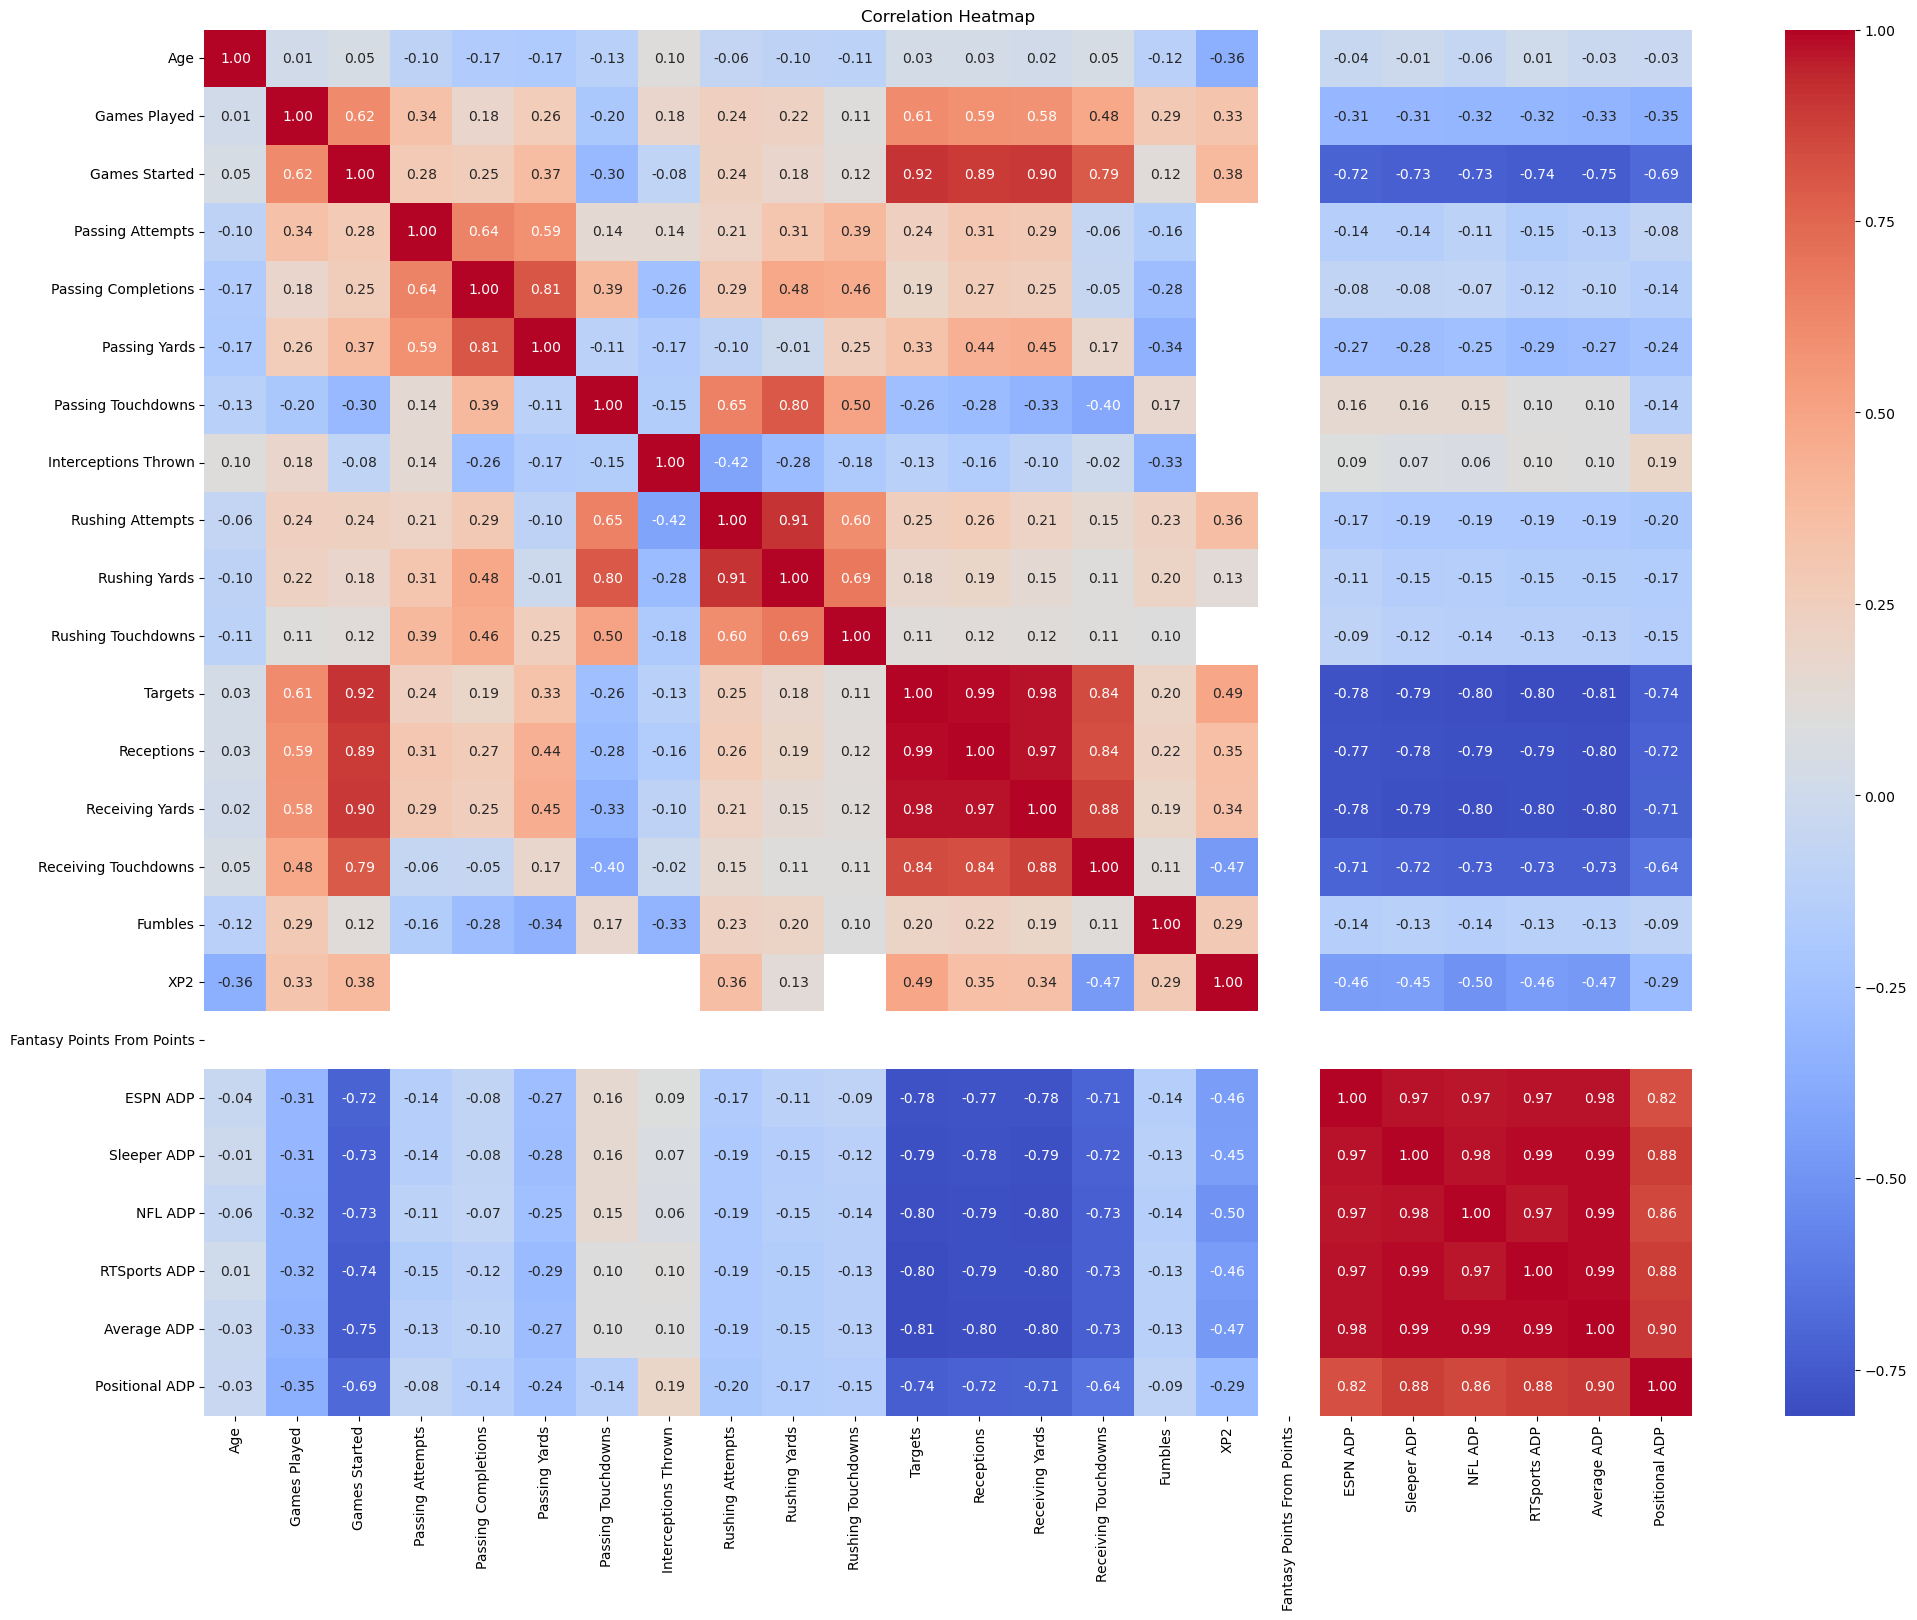

In [34]:
correlation_matrix = df_wr[['Age', 'Games Played', 'Games Started','Passing Attempts',
                            'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
                            'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
                            'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                            'Receiving Touchdowns', 'Fumbles', 'XP2', 'Fantasy Points From Points',
                            'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### WR Summary:

We have 229 WR and most of the features have the same for non-null entries. The ones that don't are the following:

'Passing Attempts', 'Passing Completions', 'Passing Yards', 'Passing Touchdowns', 'Interceptions Thrown', 'XP2'

Need to verify if it's just that these are the only players that actually have these statistics.

### RB

In [18]:
df[df['Position'] == 'RB'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 2 to 653
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  145 non-null    object 
 1   Age                          145 non-null    float64
 2   Season                       145 non-null    int64  
 3   Player ID                    145 non-null    int64  
 4   Position                     145 non-null    object 
 5   Team                         145 non-null    object 
 6   Games Played                 145 non-null    float64
 7   Games Started                145 non-null    float64
 8   Passing Attempts             7 non-null      float64
 9   Passing Completions          7 non-null      float64
 10  Passing Yards                7 non-null      float64
 11  Passing Touchdowns           7 non-null      float64
 12  Interceptions Thrown         7 non-null      float64
 13  Rushing Attempts         

In [70]:
rb_field_df = df[df['Position'] == 'RB'][['Player Name', 'Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made']]

In [71]:
rb_field_df[rb_field_df['Field Goals Made'].isnull() == False]

,Player Name,Field Goals Attempted 0-19,Field Goals Made 0-19,Field Goals Attempted 20-29,Field Goals Made 20-29,Field Goals Attempted 30-39,Field Goals Made 30-39,Field Goals Attempted 40-49,Field Goals Made 40-49,Field Goals Attempted 50+,Field Goals Made 50+,Field Goals Attempted,Field Goals Made
208,Eno Benjamin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This is the random non-null field goals player. Why is this 0 but all other NaN?

In [57]:
df.columns

Index(['Player Name', 'Age', 'Season', 'Player ID', 'Position', 'Team',
       'Games Played', 'Games Started', 'Passing Attempts',
       'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
       'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
       'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Fumbles', 'Fumbles Lost',
       'Two Point Conversions', 'Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made',
       'Extra Points Made', 'Extra Points Attempted', 'Total Yards Allowed',
       'Total Plays', 'Takeaways', 'First Downs Allowed',
       'Passing Yards Allowed', 'Passing Touchdowns Allowed',
       'Rush

#### RB Summary:

The following features need verification:

'Passing Attempts', 'Passing Completions', 'Passing Yards', 'Passing Touchdowns', 'Interceptions Thrown', 'XP2'

Also there is a single entry for the field goals. It is a single all 0 entry, rather than nulls. Likely an error.

### QB

In [19]:
df[df['Position'] == 'QB'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 4 to 648
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  84 non-null     object 
 1   Age                          84 non-null     float64
 2   Season                       84 non-null     int64  
 3   Player ID                    84 non-null     int64  
 4   Position                     84 non-null     object 
 5   Team                         84 non-null     object 
 6   Games Played                 84 non-null     float64
 7   Games Started                84 non-null     float64
 8   Passing Attempts             83 non-null     float64
 9   Passing Completions          83 non-null     float64
 10  Passing Yards                83 non-null     float64
 11  Passing Touchdowns           83 non-null     float64
 12  Interceptions Thrown         83 non-null     float64
 13  Rushing Attempts          

In [36]:
df_qb = df[df['Position'] == 'QB'][['Player Name', 'Age', 'Season',
                                      'Player ID', 'Position', 'Team',  'Games Played',
                                      'Games Started', 'Passing Attempts',
                                      'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
                                      'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
                                      'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                                      'Receiving Touchdowns', 'Fumbles', 'XP2', 'Fantasy Points From Points',
                                      'ESPN ADP', 'Sleeper ADP',  'NFL ADP',
                                      'RTSports ADP', 'Average ADP', 'Positional ADP']]

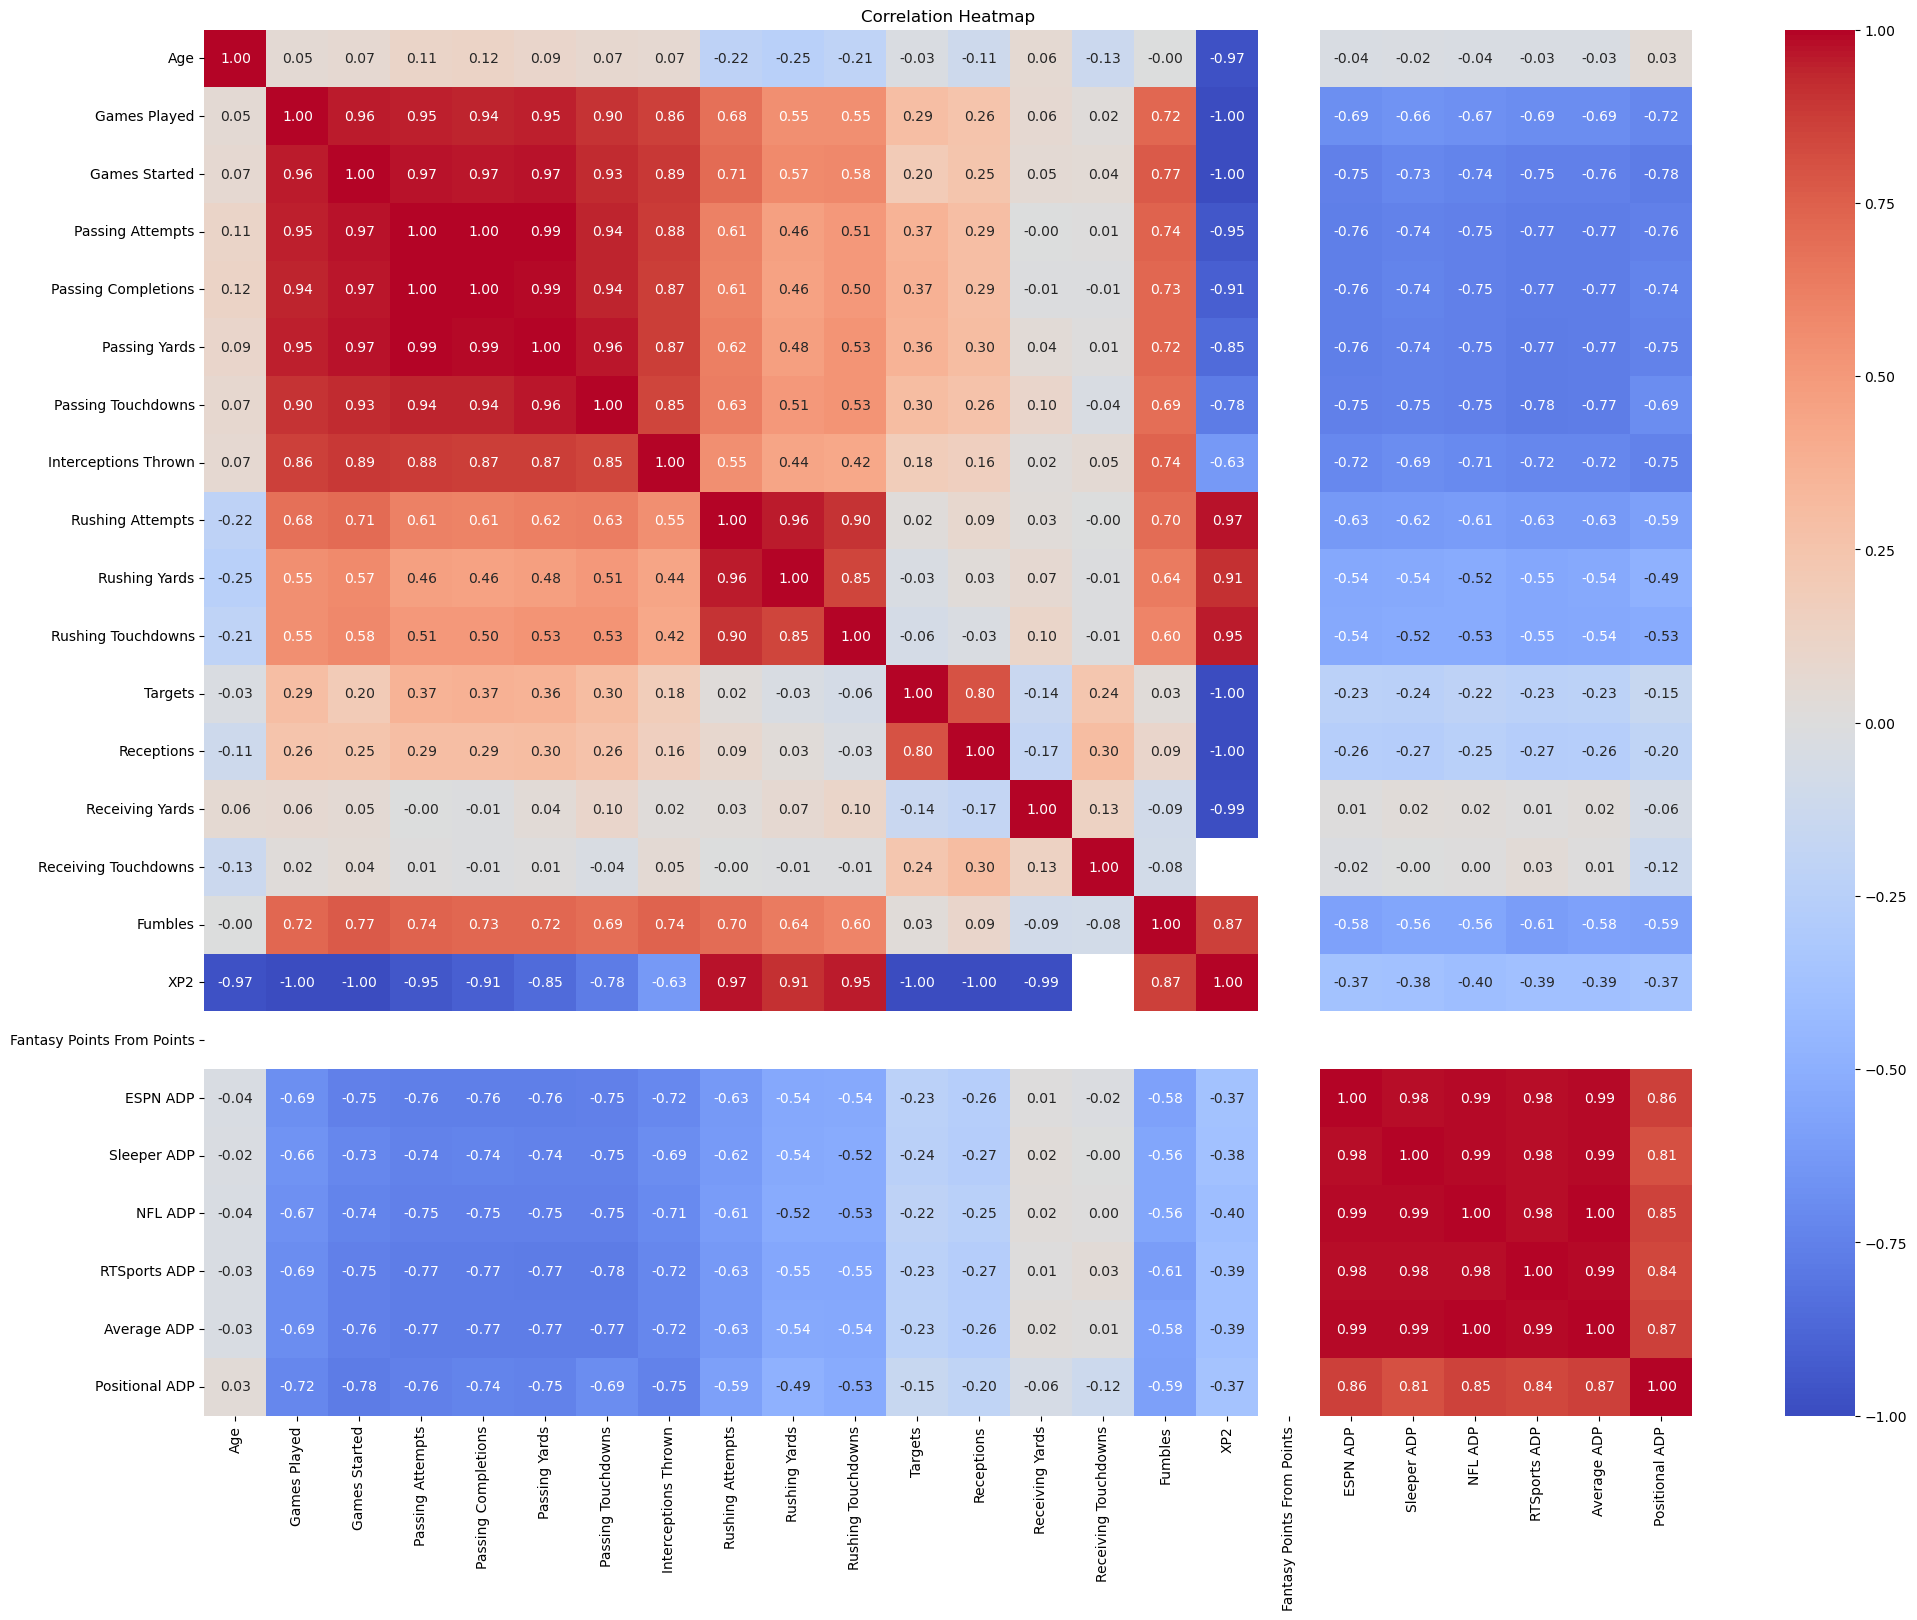

In [38]:
correlation_matrix = df_qb[['Age', 'Games Played', 'Games Started','Passing Attempts',
                            'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
                            'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
                            'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                            'Receiving Touchdowns', 'Fumbles', 'XP2', 'Fantasy Points From Points',
                            'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [73]:
df_qb['Receiving Touchdowns'].describe()

count    80.000000
mean      0.012500
std       0.111803
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: Receiving Touchdowns, dtype: float64

In [74]:
1/80

0.0125

#### QB Summary:

A few random missing values here and there except for XP2 which has significant missing values. Also recieiving touchdowns missing in the correlation heatmap is empty because theres literally only one entry that isn't 0.

### FB

In [20]:
df[df['Position'] == 'FB'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 5 to 651
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  12 non-null     object 
 1   Age                          12 non-null     float64
 2   Season                       12 non-null     int64  
 3   Player ID                    12 non-null     int64  
 4   Position                     12 non-null     object 
 5   Team                         12 non-null     object 
 6   Games Played                 12 non-null     float64
 7   Games Started                12 non-null     float64
 8   Passing Attempts             0 non-null      float64
 9   Passing Completions          0 non-null      float64
 10  Passing Yards                0 non-null      float64
 11  Passing Touchdowns           0 non-null      float64
 12  Interceptions Thrown         0 non-null      float64
 13  Rushing Attempts          

In [39]:
df_fb = df[df['Position'] == 'FB'][['Player Name', 'Age', 'Season',
                                      'Player ID', 'Position', 'Team',  'Games Played',
                                      'Games Started', 'Rushing Attempts', 'Rushing Yards',
                                      'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                                      'Receiving Touchdowns', 'Fumbles', 'Fantasy Points From Points',
                                      'ESPN ADP', 'Sleeper ADP',  'NFL ADP',
                                      'RTSports ADP', 'Average ADP', 'Positional ADP']]

In [41]:
df_fb

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Rushing Attempts,Rushing Yards,...,Receiving Yards,Receiving Touchdowns,Fumbles,Fantasy Points From Points,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
5,Adam Prentice,25.0,2022,6,FB,NOR,11.0,2.0,4.0,9.0,...,9.0,0.0,1.0,NaN,301.0,301.0,301.0,301.0,301.0,301
9,Alec Ingold,26.0,2022,10,FB,MIA,17.0,14.0,6.0,8.0,...,105.0,1.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
25,Anthony Firkser,27.0,2022,26,FB,ATL,11.0,1.0,0.0,0.0,...,100.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
72,C.J. Ham,29.0,2022,73,FB,MIN,17.0,4.0,4.0,7.0,...,86.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
102,Chris Myarick,27.0,2022,103,FB,NYG,16.0,8.0,0.0,0.0,...,65.0,1.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
183,Derek Watt,30.0,2022,184,FB,PIT,17.0,3.0,9.0,21.0,...,11.0,1.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
272,Jakob Johnson,28.0,2022,273,FB,LVR,17.0,9.0,0.0,0.0,...,10.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
386,Khari Blasingame,26.0,2022,387,FB,CHI,16.0,6.0,0.0,0.0,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
390,Kyle Juszczyk,31.0,2022,391,FB,SFO,16.0,12.0,7.0,26.0,...,200.0,1.0,0.0,NaN,301.0,301.0,253.0,301.0,253.0,1
494,Patrick Ricard,28.0,2022,495,FB,BAL,17.0,16.0,7.0,16.0,...,74.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301


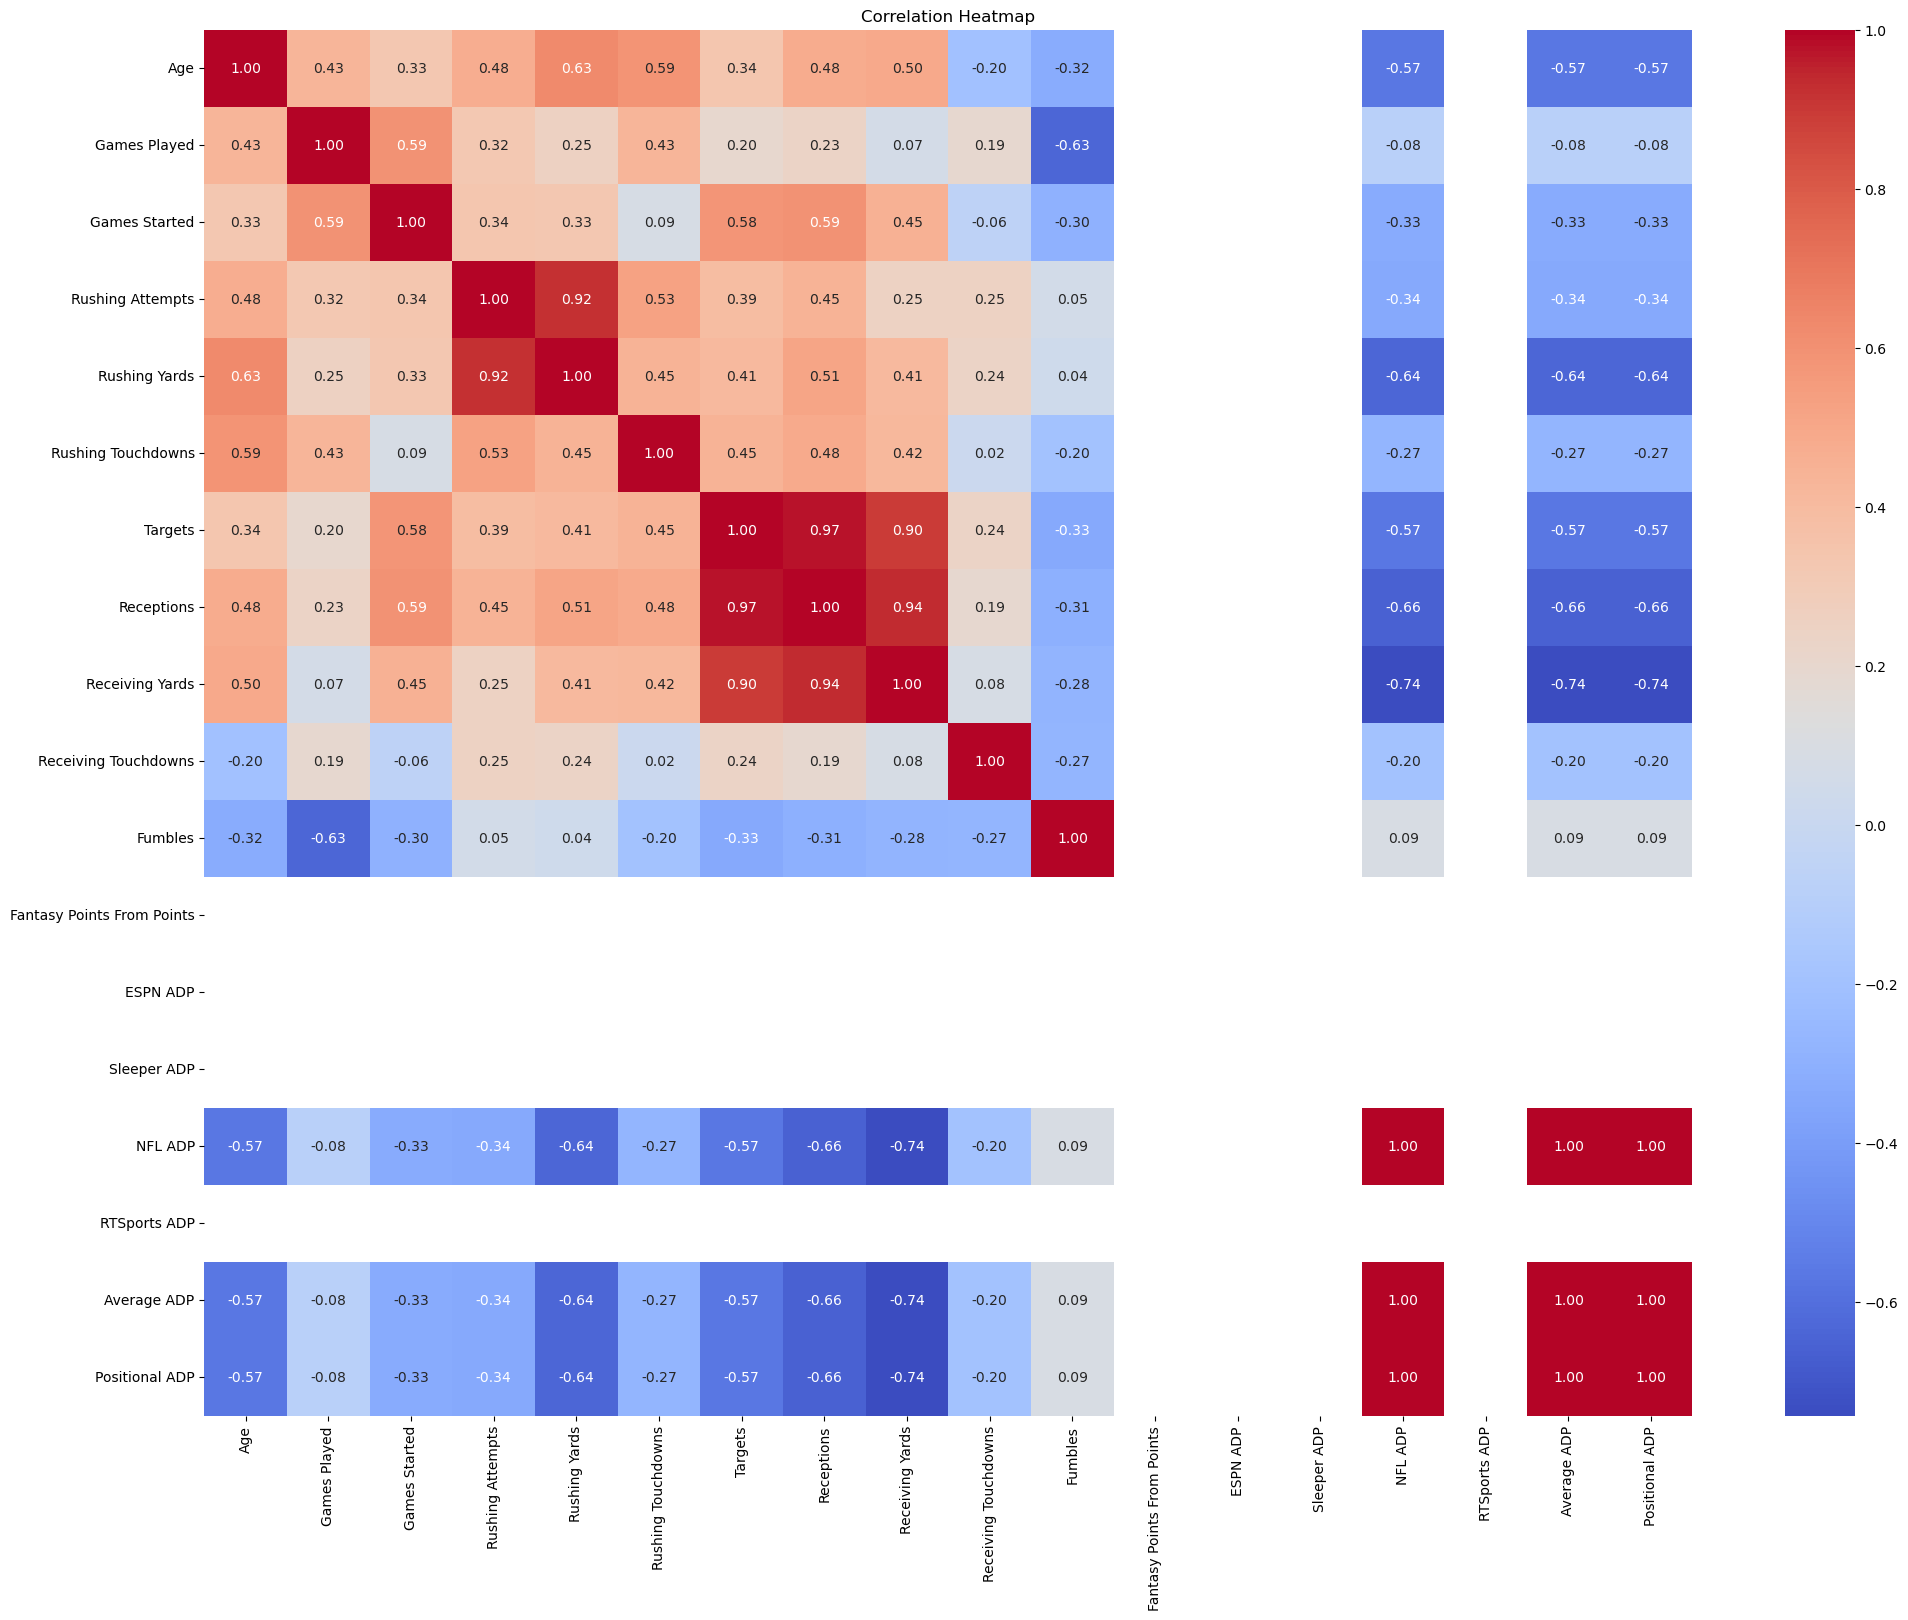

In [40]:
correlation_matrix = df_fb[['Age', 'Games Played', 'Games Started', 'Rushing Attempts', 'Rushing Yards',
                            'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                            'Receiving Touchdowns', 'Fumbles', 'Fantasy Points From Points',
                            'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### FB Summary:

Note that some of these missing features in the heatmap are features that are non-null. They simply all have the same value. Some are just null though

### TE

In [21]:
df[df['Position'] == 'TE'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 116 entries, 7 to 646
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  116 non-null    object 
 1   Age                          116 non-null    float64
 2   Season                       116 non-null    int64  
 3   Player ID                    116 non-null    int64  
 4   Position                     116 non-null    object 
 5   Team                         116 non-null    object 
 6   Games Played                 116 non-null    float64
 7   Games Started                116 non-null    float64
 8   Passing Attempts             0 non-null      float64
 9   Passing Completions          0 non-null      float64
 10  Passing Yards                0 non-null      float64
 11  Passing Touchdowns           0 non-null      float64
 12  Interceptions Thrown         0 non-null      float64
 13  Rushing Attempts         

In [42]:
df_te = df[df['Position'] == 'TE'][['Player Name', 'Age', 'Season',
                                      'Player ID', 'Position', 'Team',  'Games Played',
                                      'Games Started', 'Rushing Attempts', 'Rushing Yards',
                                      'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                                      'Receiving Touchdowns', 'Fumbles', 'XP2', 'Fantasy Points From Points',
                                      'ESPN ADP', 'Sleeper ADP',  'NFL ADP',
                                      'RTSports ADP', 'Average ADP', 'Positional ADP']]

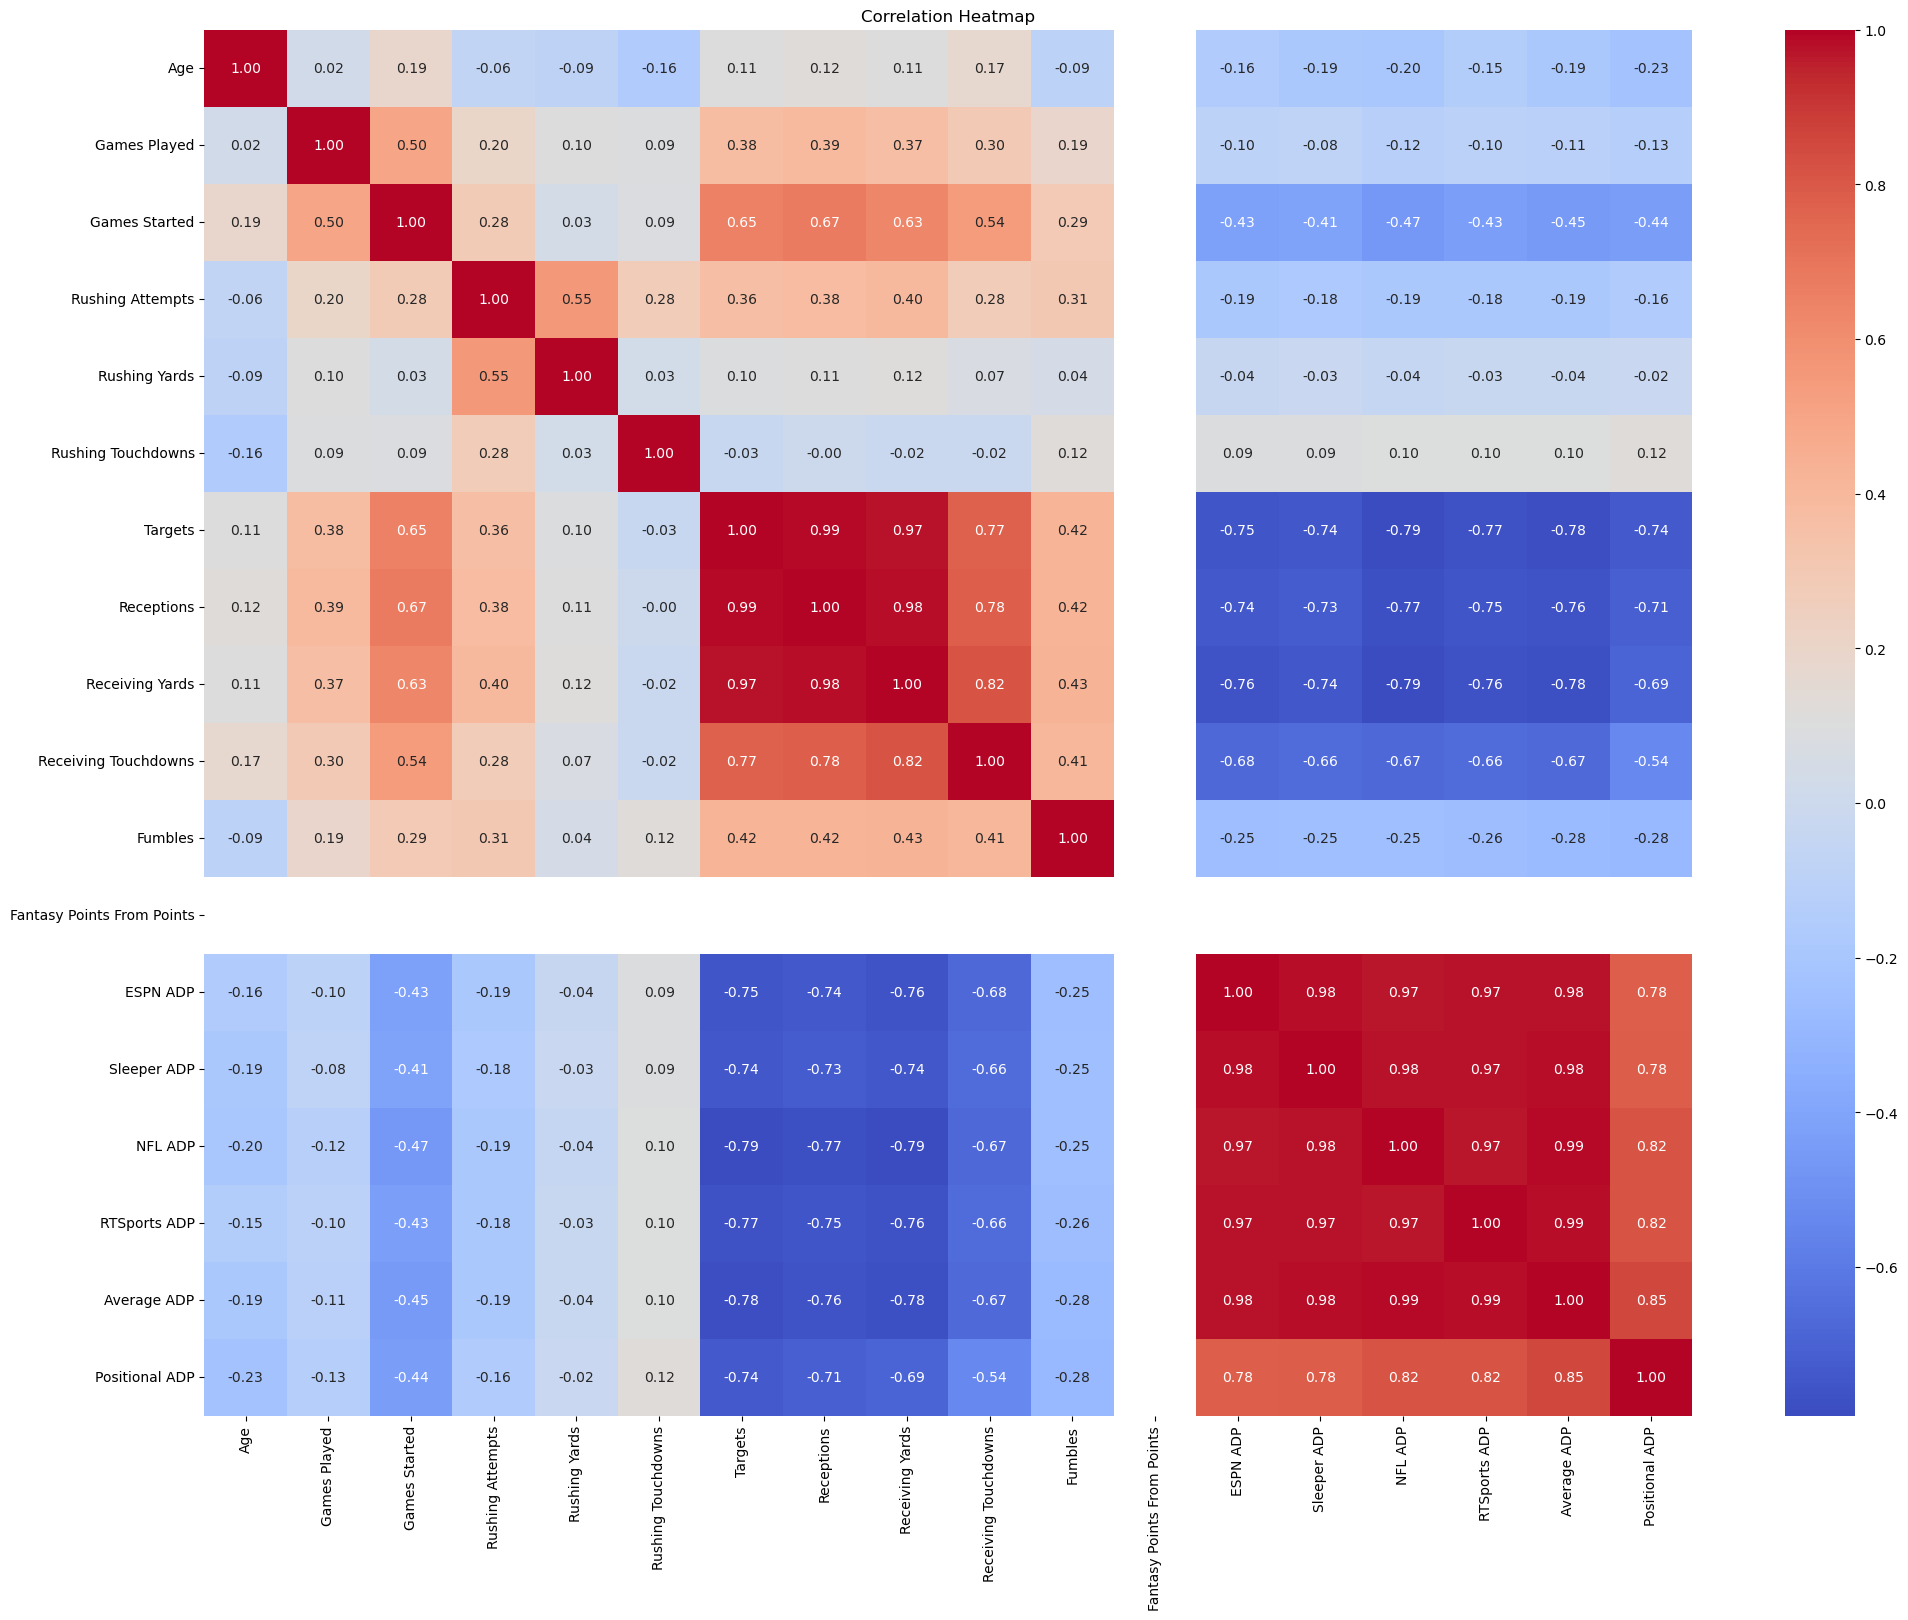

In [43]:
correlation_matrix = df_te[['Age', 'Games Played', 'Games Started', 'Rushing Attempts', 'Rushing Yards',
                            'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
                            'Receiving Touchdowns', 'Fumbles', 'Fantasy Points From Points',
                            'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### TE Summary:

Mostly good, just check XP2.

### Punter

In [45]:
df[df['Position'] == 'P'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 23 to 604
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  23 non-null     object 
 1   Age                          23 non-null     float64
 2   Season                       23 non-null     int64  
 3   Player ID                    23 non-null     int64  
 4   Position                     23 non-null     object 
 5   Team                         9 non-null      object 
 6   Games Played                 23 non-null     float64
 7   Games Started                23 non-null     float64
 8   Passing Attempts             7 non-null      float64
 9   Passing Completions          7 non-null      float64
 10  Passing Yards                7 non-null      float64
 11  Passing Touchdowns           7 non-null      float64
 12  Interceptions Thrown         7 non-null      float64
 13  Rushing Attempts         

In [47]:
df_p = df[df['Position'] == 'P'][['Player Name', 'Age', 'Season', 'Player ID', 'Position', 'Team',
       'Games Played', 'Games Started', 'Passing Attempts',
       'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
       'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
       'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Fumbles', 'Fumbles Lost',
       'Two Point Conversions', 'Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made',
       'Extra Points Made', 'Extra Points Attempted', 'Fantasy Points From Points',
       'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']]

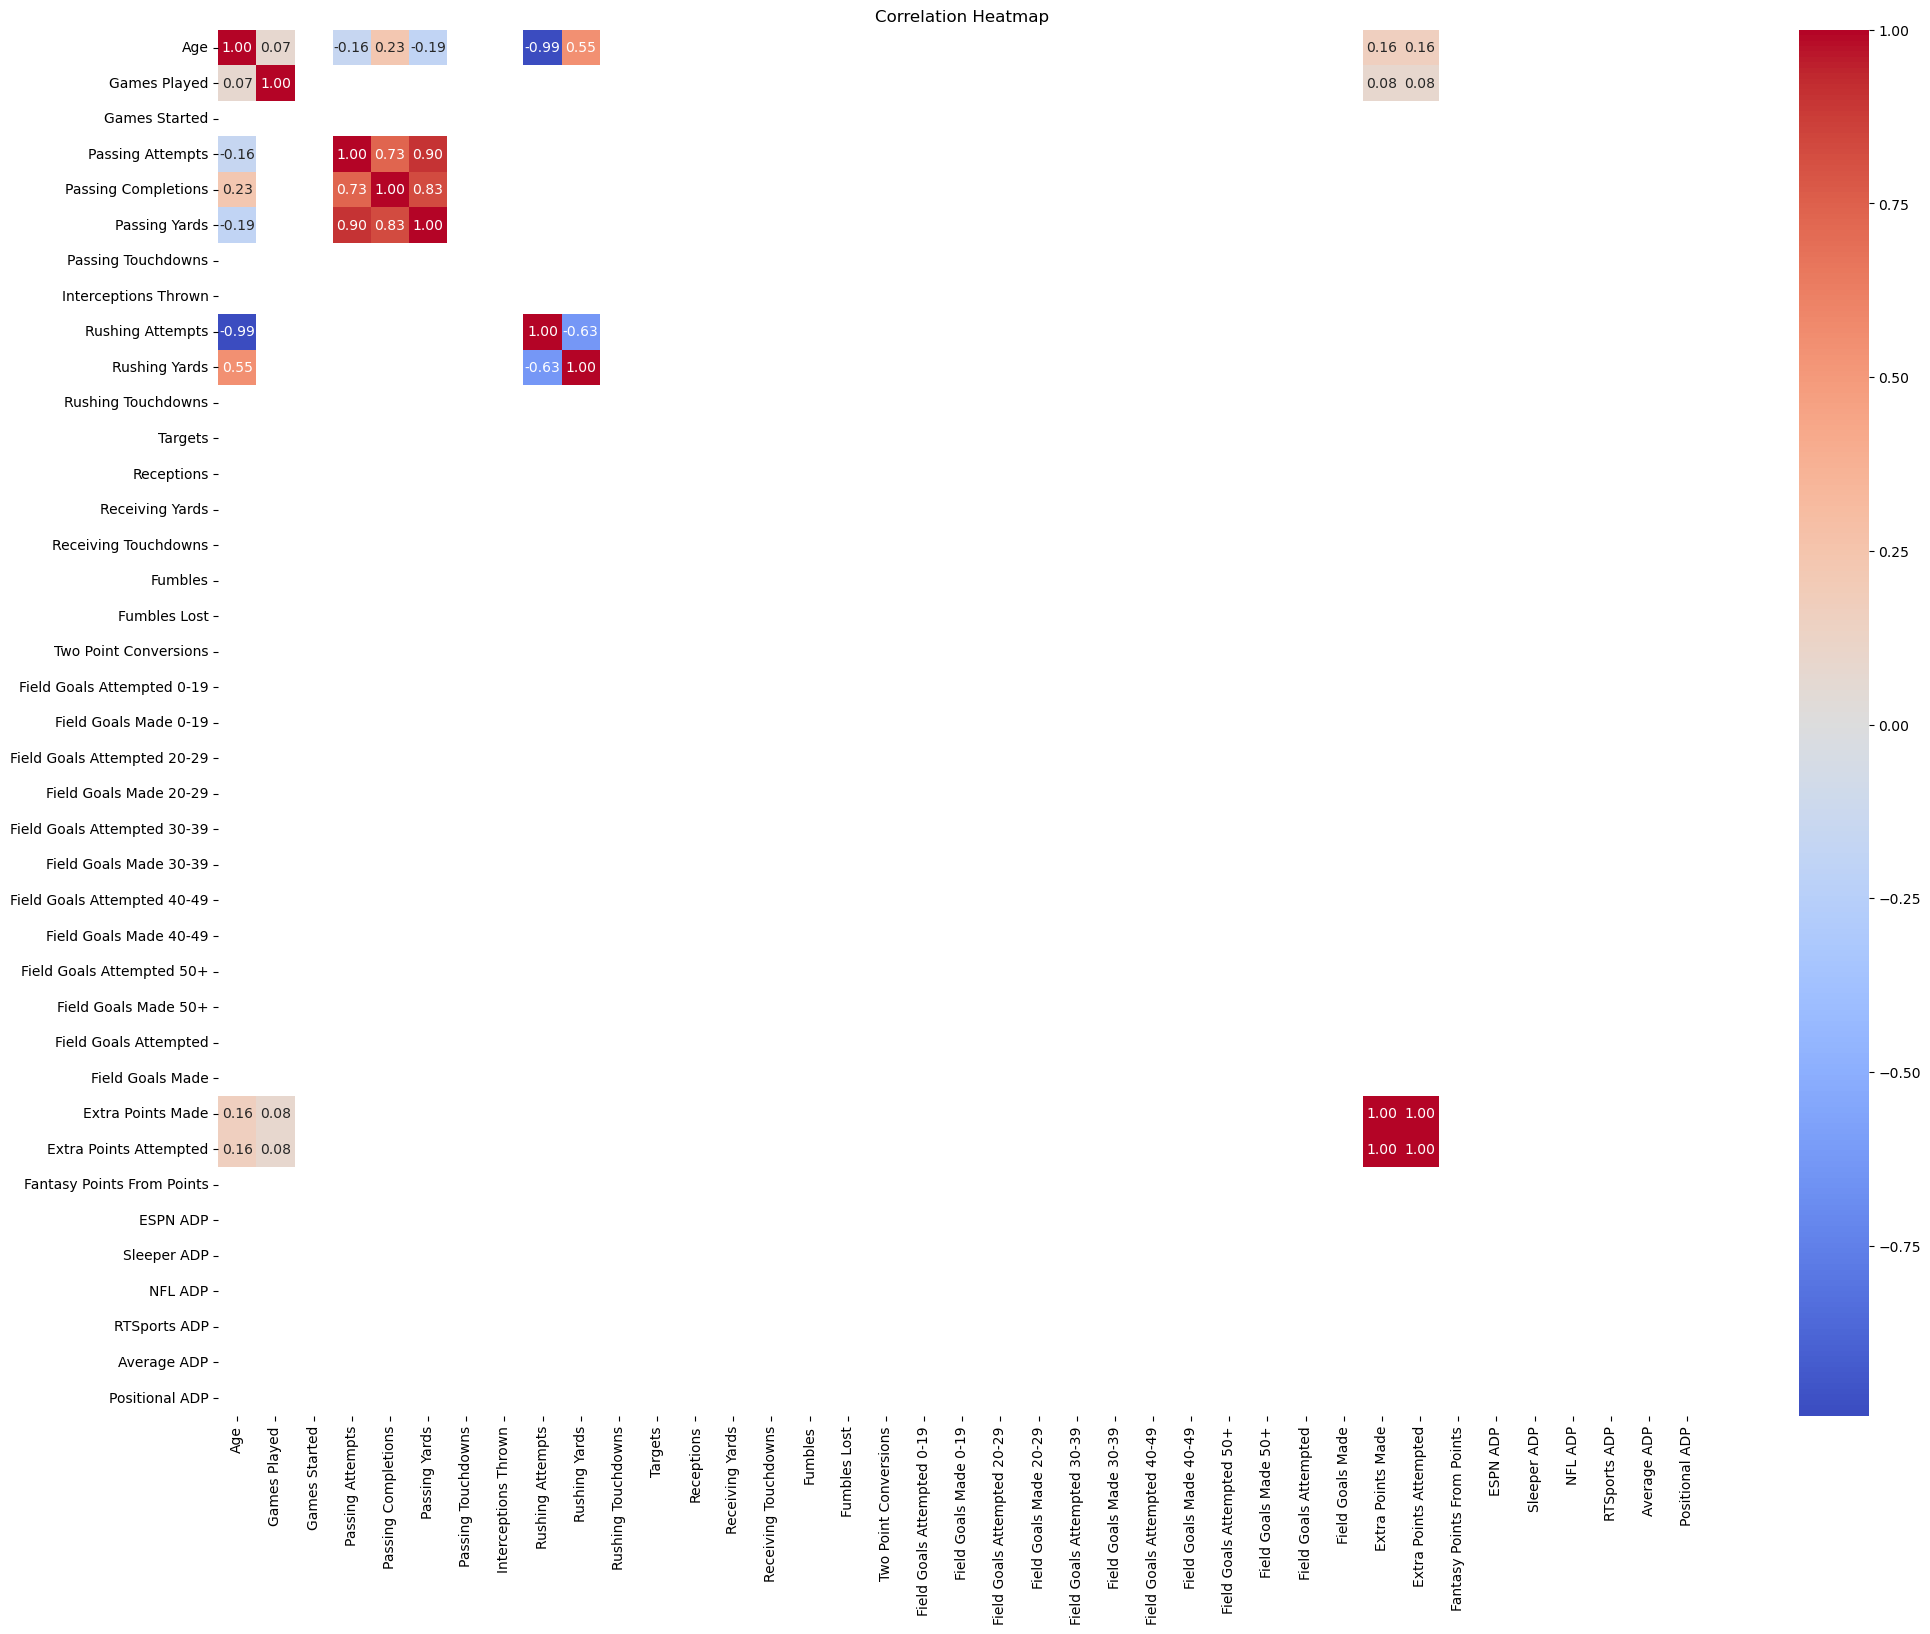

In [49]:
correlation_matrix = df_p[['Age','Games Played', 'Games Started', 'Passing Attempts',
       'Passing Completions', 'Passing Yards', 'Passing Touchdowns',
       'Interceptions Thrown', 'Rushing Attempts', 'Rushing Yards',
       'Rushing Touchdowns', 'Targets', 'Receptions', 'Receiving Yards',
       'Receiving Touchdowns', 'Fumbles', 'Fumbles Lost',
       'Two Point Conversions', 'Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made',
       'Extra Points Made', 'Extra Points Attempted', 'Fantasy Points From Points',
       'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [54]:
df_p[['Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made']].describe()

,Field Goals Attempted 0-19,Field Goals Made 0-19,Field Goals Attempted 20-29,Field Goals Made 20-29,Field Goals Attempted 30-39,Field Goals Made 30-39,Field Goals Attempted 40-49,Field Goals Made 40-49,Field Goals Attempted 50+,Field Goals Made 50+,Field Goals Attempted,Field Goals Made
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_p

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,Field Goals Made,Extra Points Made,Extra Points Attempted,Fantasy Points From Points,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
23,Andy Lee,40.0,2022,24,P,ARI,17.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
30,Arryn Siposs,30.0,2022,31,P,NaN,13.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
45,Braden Mann,25.0,2022,46,P,NYJ,17.0,0.0,2.0,1.0,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
46,Bradley Pinion,28.0,2022,47,P,NaN,17.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
65,Bryan Anger,34.0,2022,66,P,DAL,17.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,301.0,301.0,301.0,301.0,301.0,301
121,Corey Bojorquez,26.0,2022,122,P,NaN,17.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
257,JK Scott,27.0,2022,258,P,NaN,17.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
259,Jack Fox,26.0,2022,260,P,DET,17.0,0.0,1.0,1.0,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
266,Jake Bailey,25.0,2022,267,P,NaN,9.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301
267,Jake Camarda,23.0,2022,268,P,NaN,17.0,0.0,NaN,NaN,...,0.0,0.0,0.0,NaN,301.0,301.0,301.0,301.0,301.0,301


#### Punters Summary:

Lots of missing values as seen in the .info() above. Of note the team column is mostly missing, and all the actual play statistics are missing values. A ton of the values are also just 0 for all entries which may or may not be true.

### Kickers

Done below are the kickers columns

In [52]:
# These are the relevant Kicker columns

df[df['Position'] == 'K'][['Field Goals Attempted 0-19',
       'Field Goals Made 0-19', 'Field Goals Attempted 20-29',
       'Field Goals Made 20-29', 'Field Goals Attempted 30-39',
       'Field Goals Made 30-39', 'Field Goals Attempted 40-49',
       'Field Goals Made 40-49', 'Field Goals Attempted 50+',
       'Field Goals Made 50+', 'Field Goals Attempted', 'Field Goals Made', 'Extra Points Made', 'Extra Points Attempted']]

,Field Goals Attempted 0-19,Field Goals Made 0-19,Field Goals Attempted 20-29,Field Goals Made 20-29,Field Goals Attempted 30-39,Field Goals Made 30-39,Field Goals Attempted 40-49,Field Goals Made 40-49,Field Goals Attempted 50+,Field Goals Made 50+,Field Goals Attempted,Field Goals Made
34,0.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,1.0,0.0,5.0,3.0
52,0.0,0.0,7.0,6.0,6.0,4.0,10.0,10.0,13.0,8.0,36.0,28.0
58,0.0,0.0,9.0,9.0,5.0,5.0,7.0,6.0,11.0,9.0,32.0,29.0
76,0.0,0.0,5.0,5.0,12.0,9.0,8.0,6.0,7.0,4.0,32.0,24.0
77,0.0,0.0,4.0,4.0,7.0,7.0,7.0,6.0,5.0,4.0,23.0,21.0
79,0.0,0.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,4.0,3.0
83,0.0,0.0,7.0,7.0,7.0,7.0,7.0,7.0,1.0,0.0,22.0,21.0
94,0.0,0.0,7.0,7.0,6.0,5.0,11.0,9.0,12.0,9.0,36.0,30.0
96,0.0,0.0,4.0,4.0,5.0,4.0,10.0,5.0,9.0,7.0,28.0,20.0
145,0.0,0.0,9.0,9.0,11.0,11.0,4.0,3.0,13.0,11.0,37.0,34.0


In [16]:
df[df['Position'] == 'K'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 34 to 644
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  44 non-null     object 
 1   Age                          44 non-null     float64
 2   Season                       44 non-null     int64  
 3   Player ID                    44 non-null     int64  
 4   Position                     44 non-null     object 
 5   Team                         0 non-null      object 
 6   Games Played                 44 non-null     float64
 7   Games Started                44 non-null     float64
 8   Passing Attempts             0 non-null      float64
 9   Passing Completions          0 non-null      float64
 10  Passing Yards                0 non-null      float64
 11  Passing Touchdowns           0 non-null      float64
 12  Interceptions Thrown         0 non-null      float64
 13  Rushing Attempts         

#### K Summary:

Mostly good except theyre all missing the team value.

### TE/QB

In [22]:
df[df['Position'] == 'TE/QB'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 576 to 576
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  1 non-null      object 
 1   Age                          1 non-null      float64
 2   Season                       1 non-null      int64  
 3   Player ID                    1 non-null      int64  
 4   Position                     1 non-null      object 
 5   Team                         1 non-null      object 
 6   Games Played                 1 non-null      float64
 7   Games Started                1 non-null      float64
 8   Passing Attempts             1 non-null      float64
 9   Passing Completions          1 non-null      float64
 10  Passing Yards                1 non-null      float64
 11  Passing Touchdowns           1 non-null      float64
 12  Interceptions Thrown         1 non-null      float64
 13  Rushing Attempts         

In [75]:
df[df['Position'] == 'TE/QB']

,Player Name,Age,Season,Player ID,Position,Team,Games Played,Games Started,Passing Attempts,Passing Completions,...,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,XP2,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
576,Taysom Hill,32.0,2022,577,TE/QB,NOR,16.0,8.0,19.0,13.0,...,NaN,NaN,NaN,NaN,205.0,207.0,201.0,253.0,216.5,1


#### TE/QB Summary

Nothing really to say, there's only 1 entry.

### DEF

In [77]:
df[df['Position'] == 'DEF'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 654 to 685
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Player Name                  32 non-null     object 
 1   Age                          0 non-null      float64
 2   Season                       32 non-null     int64  
 3   Player ID                    32 non-null     int64  
 4   Position                     32 non-null     object 
 5   Team                         32 non-null     object 
 6   Games Played                 32 non-null     float64
 7   Games Started                32 non-null     float64
 8   Passing Attempts             0 non-null      float64
 9   Passing Completions          0 non-null      float64
 10  Passing Yards                0 non-null      float64
 11  Passing Touchdowns           0 non-null      float64
 12  Interceptions Thrown         0 non-null      float64
 13  Rushing Attempts        

In [76]:
df_def = df[df['Position'] == 'DEF'][['Player Name', 'Player ID', 'Position', 'Team',  'Games Played',
                                      'Games Started', 'Total Yards Allowed', 'Total Plays',
                                      'Takeaways', 'First Downs Allowed', 'Passing Yards Allowed',
                                      'Passing Touchdowns Allowed', 'Rushing Yards Allowed', 'Rushing Touchdowns Allowed',
                                      'Penalties Committed', 'Penalty Yards', 'First Downs by Penalty',
                                      'Percent Drives Scored On', 'Percent Drives Takeaway', 'ST_Sacks',
                                      'ST_Interceptions', 'ST_Fumble Recoveries', 'ST_Forced Fumbles',
                                      'ST_Safeties', 'ST_Special Teams Touchdowns', 'Fantasy Points From Points',
                                      'ESPN ADP', 'Sleeper ADP',  'NFL ADP',
                                      'RTSports ADP', 'Average ADP', 'Positional ADP']]


 

In [78]:
df_def

,Player Name,Player ID,Position,Team,Games Played,Games Started,Total Yards Allowed,Total Plays,Takeaways,First Downs Allowed,...,ST_Forced Fumbles,ST_Safeties,ST_Special Teams Touchdowns,Fantasy Points From Points,ESPN ADP,Sleeper ADP,NFL ADP,RTSports ADP,Average ADP,Positional ADP
654,San Francisco 49ers DST,655,DEF,SFO,17.0,17.0,5110.0,1026.0,30.0,291.0,...,13.0,0.0,0.0,27.0,121.0,121.0,91.0,142.0,118.8,3
655,Buffalo Bills DST,656,DEF,BUF,16.0,16.0,5106.0,997.0,27.0,313.0,...,10.0,2.0,2.0,17.0,80.0,94.0,65.0,129.0,92.0,1
656,Baltimore Ravens DST,657,DEF,BAL,17.0,17.0,5513.0,1047.0,25.0,323.0,...,14.0,0.0,1.0,18.0,119.0,125.0,171.0,224.0,159.8,10
657,New York Jets DST,658,DEF,NYJ,17.0,17.0,5288.0,1093.0,16.0,310.0,...,9.0,2.0,1.0,16.0,301.0,301.0,272.0,301.0,272.0,29
658,Cincinnati Bengals DST,659,DEF,CIN,16.0,16.0,5371.0,996.0,24.0,295.0,...,13.0,0.0,0.0,12.0,195.0,221.0,189.0,277.0,220.5,19
659,Dallas Cowboys DST,660,DEF,DAL,17.0,17.0,5613.0,1101.0,33.0,327.0,...,21.0,0.0,0.0,14.0,130.0,139.0,108.0,178.0,138.8,7
660,Washington Commanders DST,661,DEF,WAS,17.0,17.0,5178.0,998.0,18.0,286.0,...,7.0,1.0,0.0,8.0,193.0,301.0,239.0,263.0,231.7,22
661,Philadelphia Eagles DST,662,DEF,PHI,17.0,17.0,5125.0,1072.0,27.0,325.0,...,15.0,0.0,0.0,12.0,172.0,200.0,179.0,238.0,197.3,16
662,New Orleans Saints DST,663,DEF,NOR,17.0,17.0,5352.0,1076.0,14.0,319.0,...,11.0,0.0,0.0,12.0,105.0,144.0,123.0,169.0,135.3,6
663,Pittsburgh Steelers DST,664,DEF,PIT,17.0,17.0,5617.0,1024.0,23.0,314.0,...,9.0,0.0,0.0,6.0,147.0,176.0,148.0,228.0,174.8,14


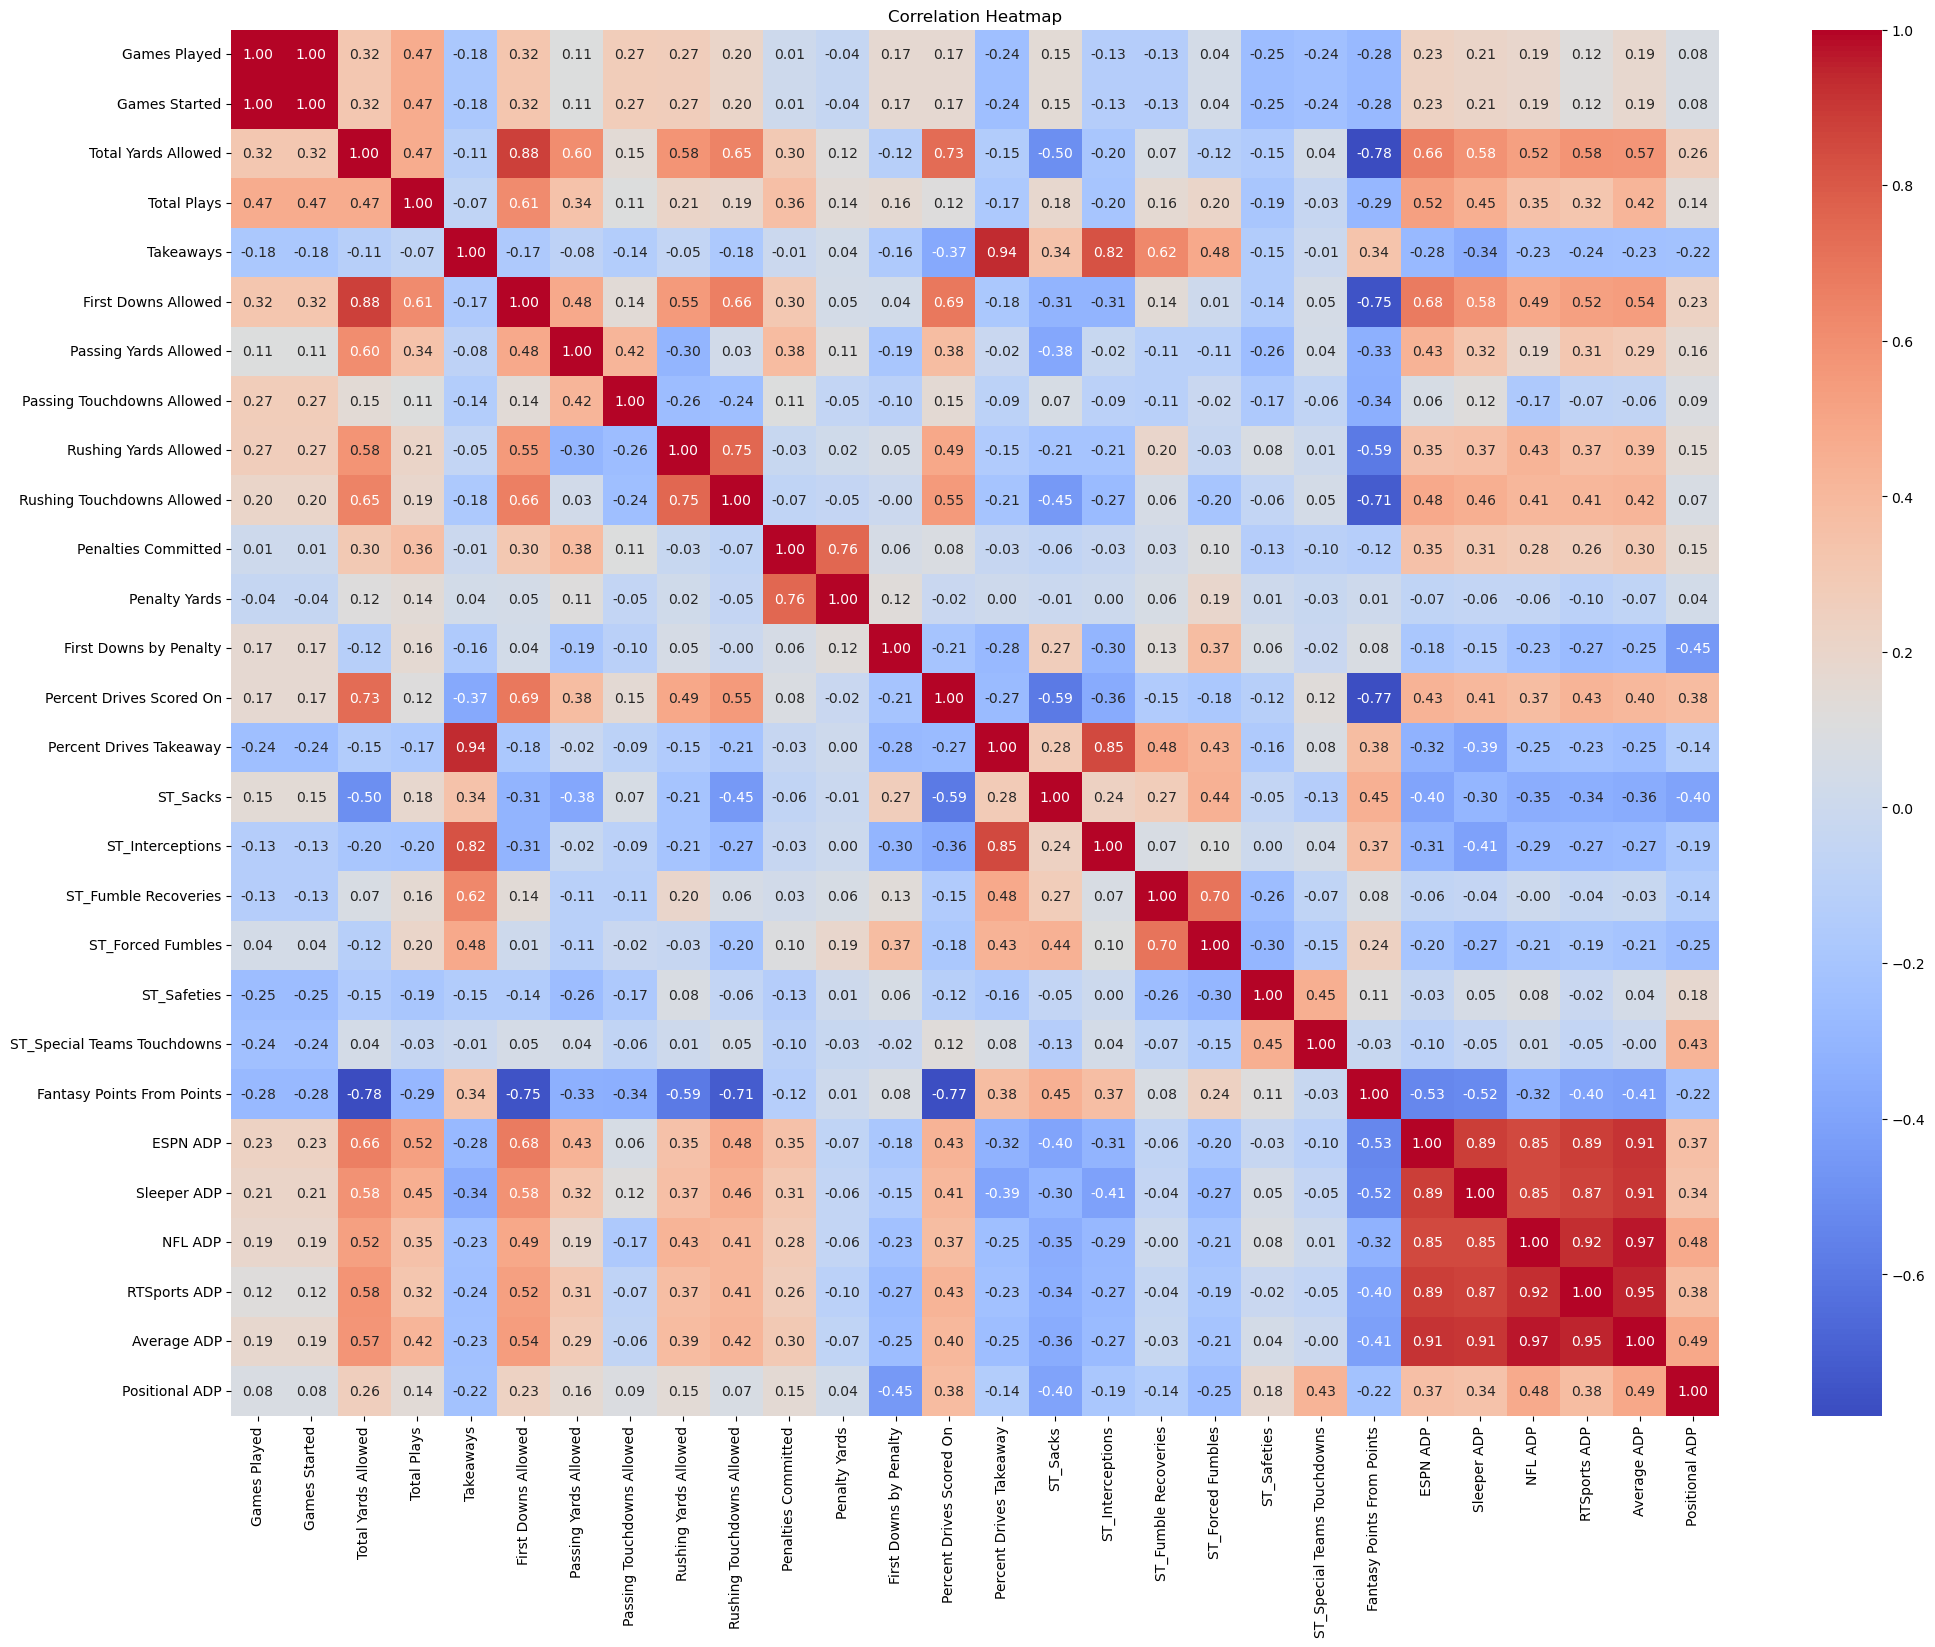

In [79]:
correlation_matrix = df_def[['Games Played', 'Games Started', 'Total Yards Allowed', 'Total Plays',
                            'Takeaways', 'First Downs Allowed', 'Passing Yards Allowed',
                            'Passing Touchdowns Allowed', 'Rushing Yards Allowed', 'Rushing Touchdowns Allowed',
                            'Penalties Committed', 'Penalty Yards', 'First Downs by Penalty',
                            'Percent Drives Scored On', 'Percent Drives Takeaway', 'ST_Sacks',
                            'ST_Interceptions', 'ST_Fumble Recoveries', 'ST_Forced Fumbles',
                            'ST_Safeties', 'ST_Special Teams Touchdowns', 'Fantasy Points From Points',
                            'ESPN ADP', 'Sleeper ADP',  'NFL ADP', 'RTSports ADP', 'Average ADP', 'Positional ADP']].corr()
plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### DEF Summary:

Nothing to say, looks fully complete.

## Current Data Validation Summary:

Lots of the values are good to go with random features that are missing. I looked at the csv in excel and confirmed it wasn't just me reading it into a dataframe wrong. The entries that are null even when some other entries have value are actually null. Example: the punters with field goals actually have entered values and the punters with NaNs actually have no entered values in the spreadsheet. 

I would have initially assumed that some 0 values where simply not being input, but my analysis showed thats not necessarily the case. Again compare Andy Lee to Arryn Siposs in punters with the field goal stuff. That said it may still be important to consider this possibility for all entries that are missing values due to the fact that we are scraping from many sources and with many different functions both of which may have their own issues.

Only other issue we have Two Points Conversion and XP2. Aren't these the same thing or have I misunderstood what XP2 is.

### Recommended Follow-up

You guys may be better able to understand what features should actually be had by what positions. For example, did I completely miss that one of the columns is totally missing even though a player in that position should absolutely have it? Also, I need to better understand what the Fantasy Points From Points feature means. Should every position have this?


### EDA/Feature Engineering Side

We're already seeing that some of our features are HIGHLY correlated and may be ripe for removal. I think the way we may want to go about it is to look at two features that are extremely correlated and compare which is more correlated to the target/targets. But I think I want to consider this a bit more and also look into other correlation metrics before we commit to anything.

## Next Steps for Me

- Look into By Team metrics
- Spearman correlation heatmaps
- Deeper look at values
    - Box and Whiskers (by pos?) to look if values are actually valuable.
        - eg games played, games started. If they're always the same for these players whats the point of having them?
    - Histograms
    - other graphs?
 